In [58]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
import sklearn


In [59]:

from sklearn.datasets import load_iris
iris=load_iris()
X=iris.data
y=iris.target


In [60]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [61]:
import pandas as pd
df=pd.concat([pd.DataFrame(X,columns=iris.feature_names),pd.DataFrame(y,columns=["Species"])],axis=1)

In [62]:
X[:5]

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2]])

In [63]:
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [64]:
df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Species
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


Text(0.5, 1.0, 'Feature engeneering visualisation(surface=width*lenght)')

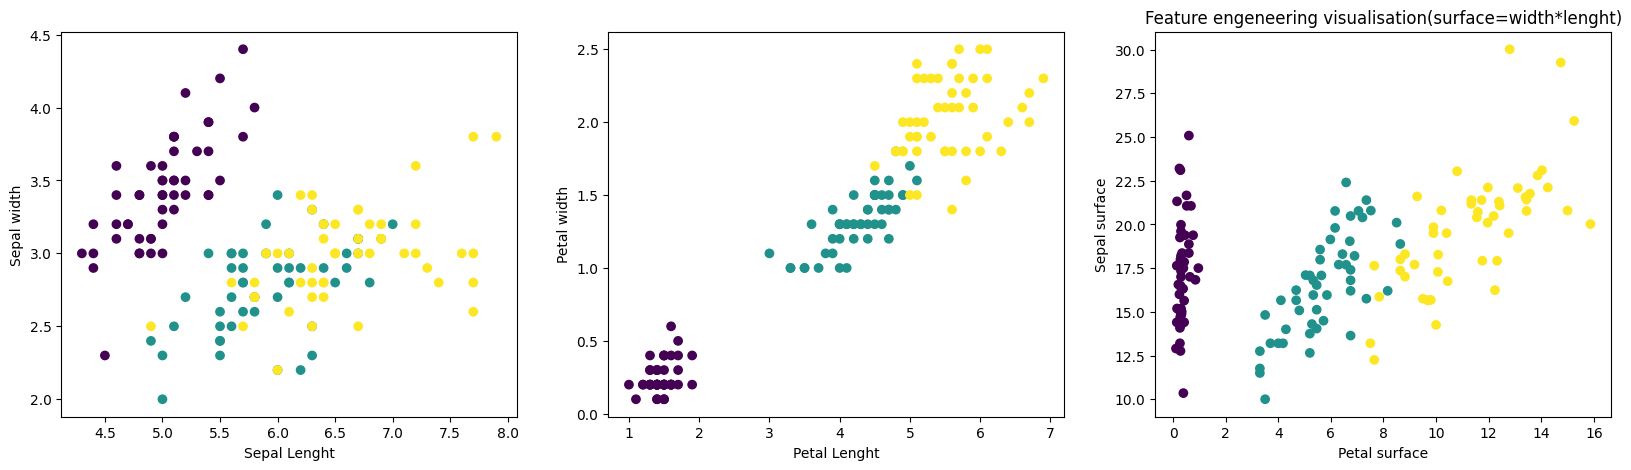

In [65]:
plt.figure(figsize=(20,5))
plt.subplot(1,3,1)
plt.scatter(df["sepal length (cm)"],df["sepal width (cm)"],c=df["Species"])
plt.xlabel("Sepal Lenght")
plt.ylabel("Sepal width")
plt.subplot(1,3,2)
plt.scatter(df["petal length (cm)"],df["petal width (cm)"],c=df["Species"])
plt.xlabel("Petal Lenght")
plt.ylabel("Petal width")
plt.subplot(1,3,3)
plt.scatter(df["petal length (cm)"]*df["petal width (cm)"],df["sepal length (cm)"]*df["sepal width (cm)"],c=df["Species"])
plt.xlabel("Petal surface")
plt.ylabel("Sepal surface")
plt.title("Feature engeneering visualisation(surface=width*lenght)")

In [66]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn import svm

In [67]:
X=df.drop(["Species"],axis=1)
y=df["Species"]

In [68]:
(X_train,X_test,y_train,y_test)=train_test_split(X,y,test_size=0.20,random_state=0)

In [69]:
models={"LogisticRegression": LogisticRegression(random_state=0),
        "DecisionTree":DecisionTreeClassifier(),
        "KNN":KNeighborsClassifier(50),
        "SVM":svm.SVC()}

In [70]:
def training (models,X_train,y_train,X_test,y_test):
    for name,model in models.items():
        print(name,":")
        model.fit(X_train,y_train)
        print("Score:",model.score(X_test,y_test))
        print("-----")

In [71]:
training(models,X_train,y_train,X_test,y_test)

LogisticRegression :
Score: 1.0
-----
DecisionTree :
Score: 1.0
-----
KNN :
Score: 0.8666666666666667
-----
SVM :
Score: 1.0
-----


C:\Users\fred\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
